<a href="https://colab.research.google.com/github/nour614/Class-Assignments/blob/main/Nour_Tafa_Regression_Metrics_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Pandas
import pandas as pd
## Numpy
import numpy as np

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [ ]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics for a model
def eval_regression(y_true, y_pred, name='model'):
  """Takes true targets and predictions from a regression model and prints
  MAE, MSE, RMSE, AND R2 scores
  Set 'name' to name of model and 'train' or 'test' as appropriate"""
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'{name} Scores')
  print(f'MAE: {mae:,.4f} \nMSE: {mse:,.4f} \nRMSE: {rmse:,.4f} \nR2: {r2:.4f}\n')

1. 1. Load and inspect the data

In [ ]:
path = '/content/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(path)


In [ ]:
df

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2
...,...,...,...,...,...,...,...
501,0.06263,0.573,6.593,69.1,21.0,9.67,22.4
502,0.04527,0.573,6.120,76.7,21.0,9.08,20.6
503,0.06076,0.573,6.976,91.0,21.0,5.64,23.9
504,0.10959,0.573,6.794,89.3,21.0,6.48,22.0


In [ ]:
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [ ]:
df.shape

(506, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(7)
memory usage: 27.8 KB


In [ ]:
df.describe(include="number")

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,6.284634,68.574901,18.455534,12.653063,22.532806
std,8.601545,0.115878,0.702617,28.148861,2.164946,7.141062,9.197104
min,0.006320,0.385000,3.561000,2.900000,12.600000,1.730000,5.000000
25%,0.082045,0.449000,5.885500,45.025000,17.400000,6.950000,17.025000
50%,0.256510,0.538000,6.208500,77.500000,19.050000,11.360000,21.200000
75%,3.677083,0.624000,6.623500,94.075000,20.200000,16.955000,25.000000
max,88.976200,0.871000,8.780000,100.000000,22.000000,37.970000,50.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


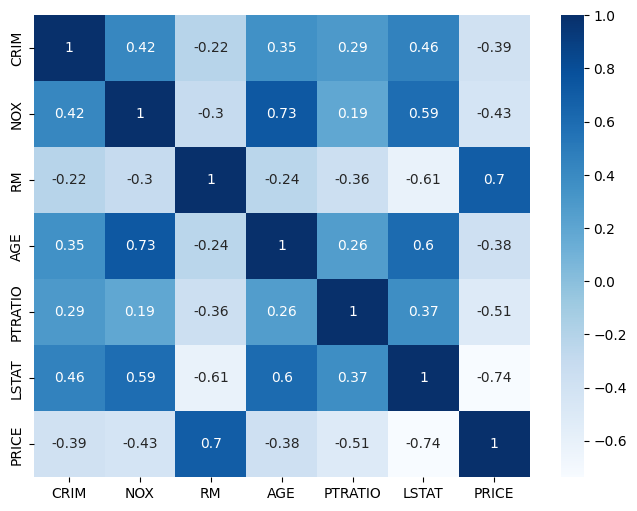

In [ ]:
corr=df.corr()
fig, ax = plt.subplots(figsize = (8, 6))
ax = sns.heatmap(corr, cmap= 'Blues', annot = True)

In [ ]:
y = df['PRICE']
X=df.drop(columns=['PRICE','NOX','CRIM','AGE'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 182 to 102
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       379 non-null    float64
 1   PTRATIO  379 non-null    float64
 2   LSTAT    379 non-null    float64
dtypes: float64(3)
memory usage: 11.8 KB


In [ ]:
X_train.head()

,RM,PTRATIO,LSTAT
182,7.155,17.8,4.82
155,6.152,14.7,15.02
280,7.820,14.9,3.76
126,5.613,19.1,27.26
329,6.333,16.9,7.34


In [ ]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
number_tuple = (scaler, num_selector)
category_tuple = (ohe, cat_selector)

In [ ]:
preprocessor = make_column_transformer(number_tuple, category_tuple,  remainder='drop', verbose_feature_names_out=False)

In [ ]:
preprocessor.fit(X_train)

# transform train and test
X_train_processed = pd.DataFrame(preprocessor.transform(X_train),
                                 columns=preprocessor.get_feature_names_out())

X_test_processed = pd.DataFrame(preprocessor.transform(X_test),
                                 columns=preprocessor.get_feature_names_out())
# Check for missing values and that data is scaled and one-hot encoded
display(X_train_processed.head(2))
X_train_processed.info()

,RM,PTRATIO,LSTAT
0,1.156255,-0.205157,-1.077756
1,-0.238475,-1.576252,0.351165


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       379 non-null    float64
 1   PTRATIO  379 non-null    float64
 2   LSTAT    379 non-null    float64
dtypes: float64(3)
memory usage: 9.0 KB


Baseline Model

In [ ]:

dummy = DummyRegressor(strategy='mean')

dummy_pipe = make_pipeline(preprocessor, dummy)


dummy_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f39f8d2b0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3c7d60d0>)],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

In [ ]:
train_pred = dummy_pipe.predict(X_train)
test_pred = dummy_pipe.predict(X_test)

eval_regression(y_test, test_pred, name='dummy model Test')
eval_regression(y_train, train_pred, name='dummy model Train')

dummy model Test Scores
MAE: 6.2228 
MSE: 72.2608 
RMSE: 8.5006 
R2: -0.0319

dummy model Train Scores
MAE: 6.8893 
MSE: 88.6817 
RMSE: 9.4171 
R2: 0.0000



In [ ]:
linreg = LinearRegression()
linreg_pipe = make_pipeline(preprocessor, linreg)

In [ ]:
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f39f8d2b0>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5f3c7d60d0>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
lin_train_pred = linreg_pipe.predict(X_train)
lin_test_pred = linreg_pipe.predict(X_test)

eval_regression(y_train, lin_train_pred, name='linreg train')
eval_regression(y_test, lin_test_pred, name='linreg test')

linreg train Scores
MAE: 3.7141 
MSE: 27.6867 
RMSE: 5.2618 
R2: 0.6878

linreg test Scores
MAE: 3.3918 
MSE: 25.6888 
RMSE: 5.0684 
R2: 0.6332



Evaluate your model performance using R^2 on the training set and on the test set.

In [ ]:
train_r2=r2_score(train_pred,y_train)
test_r2=r2_score(test_pred,y_test)

print(f'Model Training R2:{train_r2}')
print(f'Model Testing R2:{test_r2}')

Model Training R2:0.0
Model Testing R2:-6.361208287209004e+29


Evaluate your model on both data sets using mean absolute error (MAE).



In [ ]:
train_MAE=mean_absolute_error(train_pred,y_train)
test_MAE=mean_absolute_error(test_pred,y_test)

print(f'Model Training MAE:{train_MAE}')

print(f'Model Testing MAE:{test_MAE}')

Model Training MAE:6.889290662136855
Model Testing MAE:6.222778551097999


Evaluate your model on both data sets using mean squared error (MSE)

In [ ]:
train_MSE=mean_squared_error(train_pred,y_train)
test_MSE=mean_squared_error(test_pred,y_test)

print(f'Model Training MAE:{train_MSE}')

print(f'Model Testing MAE:{test_MSE}')

Model Training MAE:88.68173153904524
Model Testing MAE:72.2607627995582


Evaluate your model performance using RMSE on the training set and on the test set. 

In [ ]:
train_RMSE=np.sqrt(train_MSE)
test_RMSE=np.sqrt(test_MSE)
print(f'Model Training MAE:{train_RMSE}')

print(f'Model Testing MAE:{test_RMSE}')

Model Training MAE:9.41709782996042
Model Testing MAE:8.500633082280295
